#NOTE:

###For below shap force plot and Individual force plots please re-run the code present or else it's showcasing as "Visualization omitted, Javascript library not loaded!" error. Even though shap.initjs() is written in each separate blocks.

###Thanks!!!

# **SHAP**(SHapley Additive exPlanations):
 
###It can be used to explain the predictions of any machine learning model by calculating the contribution of each feature to the prediction.

In [2]:
!pip install shap
#Installing SHAP

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 575 kB 6.2 MB/s 


In [3]:
#importing the required libraries 
import pandas as pd
import shap
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder
from sklearn_pandas import DataFrameMapper
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [55]:
#Importing the Dataset.
data=pd.read_csv("/content/drive/MyDrive/House_Rent_Dataset.csv")
datac=pd.read_csv("/content/drive/MyDrive/House_Rent_Dataset.csv")

In [31]:
data.name = "data"
data.head()

Posted On  BHK   Rent  Size            Floor    Area Type  \
0  2022-05-18    2  10000  1100  Ground out of 2   Super Area   
1  2022-05-13    2  20000   800       1 out of 3   Super Area   
2  2022-05-16    2  17000  1000       1 out of 3   Super Area   
3  2022-07-04    2  10000   800       1 out of 2   Super Area   
4  2022-05-09    2   7500   850       1 out of 2  Carpet Area   

              Area Locality     City Furnishing Status  Tenant Preferred  \
0                    Bandel  Kolkata       Unfurnished  Bachelors/Family   
1  Phool Bagan, Kankurgachi  Kolkata    Semi-Furnished  Bachelors/Family   
2   Salt Lake City Sector 2  Kolkata    Semi-Furnished  Bachelors/Family   
3               Dumdum Park  Kolkata       Unfurnished  Bachelors/Family   
4             South Dum Dum  Kolkata       Unfurnished         Bachelors   

   Bathroom Point of Contact  
0         2    Contact Owner  
1         1    Contact Owner  
2         1    Contact Owner  
3         1    Contact Owner  
4         1    Contact Owner

In [6]:
#Data types of the columns present in the DataSet
data.dtypes

Posted On            object
BHK                   int64
Rent                  int64
Size                  int64
Floor                object
Area Type            object
Area Locality        object
City                 object
Furnishing Status    object
Tenant Preferred     object
Bathroom              int64
Point of Contact     object
dtype: object

In [7]:
data.count()

Posted On            4746
BHK                  4746
Rent                 4746
Size                 4746
Floor                4746
Area Type            4746
Area Locality        4746
City                 4746
Furnishing Status    4746
Tenant Preferred     4746
Bathroom             4746
Point of Contact     4746
dtype: int64

In [8]:
# To check duplicated values 
print(data.duplicated().value_counts()) 

False    4746
dtype: int64


We can see from above that there are no duplicates present in our data.

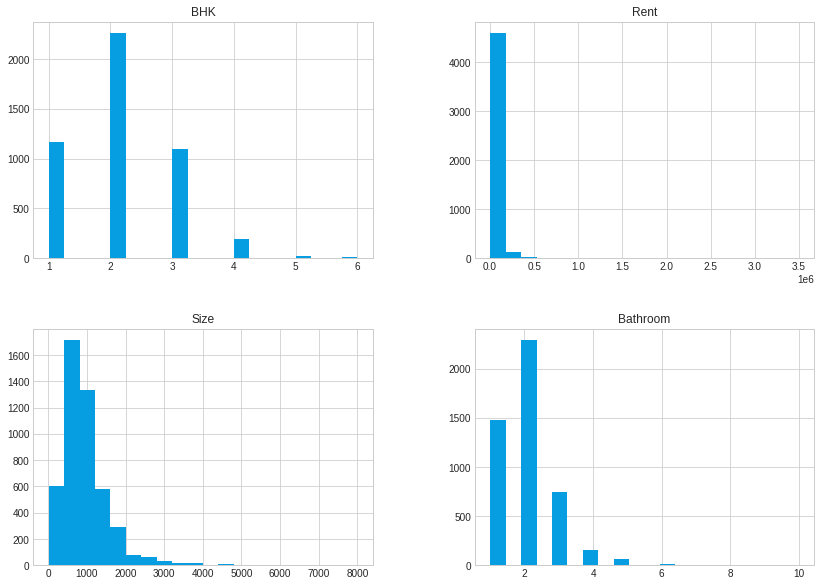

In [9]:
#Histogram plotting of all the numerical or qualitative variables present in our dataset.
#Helps us understand if there is normalcy in our data or not, from below we can say that our data seems normal.
plt.style.use('seaborn-whitegrid')
data.hist(bins=20, figsize=(14,10), color='#069EE1')
plt.show();

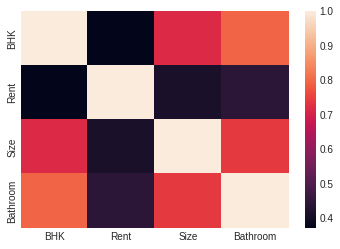

In [10]:
sns.heatmap(data.corr())

Corr heatmap to check the correlation between the numerical variables.
We can see that Rent is higly correlated to BHK followed by Size.

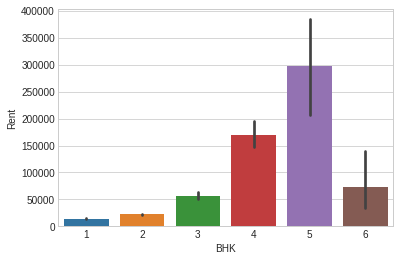

In [11]:
sns.barplot(x = data['BHK'], y = data['Rent'], data = data)

Rent relation w.r.t no of BHK, We can see an gradual inc in rent with no of bhk.

In [12]:
# We need to check missing values in dataset
data.isnull().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

In [56]:
#Droping below colums since they have many values in them they create a lot of dummy variable columns 
#and increase both complexity and time for our function.
drop_list = ['Area Locality','Posted On','Floor','Point of Contact']
data.drop(drop_list,axis=1,inplace=True)
datac.drop(drop_list,axis=1,inplace=True)

In [58]:
#Normalizing all the values present in the dataset.(

data = pd.get_dummies(data)


from sklearn import preprocessing
import pandas as pd

In [59]:

# Normalizing the data in the columns beacuse some values are too high when compared to other independent variable

from sklearn import preprocessing

# Create x to store scaled values as floats

x = data[['BHK','Size','Bathroom','Rent']].values.astype(float)

# Preparing for normalizing
min_max_scaler = preprocessing.MinMaxScaler()

# Transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
data[['BHK','Size','Bathroom','Rent']] = pd.DataFrame(x_scaled)

In [60]:
data.head()

BHK      Rent      Size  Bathroom  Area Type_Built Area  \
0  0.2  0.002515  0.136421  0.111111                     0   
1  0.2  0.005373  0.098874  0.000000                     0   
2  0.2  0.004516  0.123905  0.000000                     0   
3  0.2  0.002515  0.098874  0.000000                     0   
4  0.2  0.001801  0.105131  0.000000                     0   

   Area Type_Carpet Area  Area Type_Super Area  City_Bangalore  City_Chennai  \
0                      0                     1               0             0   
1                      0                     1               0             0   
2                      0                     1               0             0   
3                      0                     1               0             0   
4                      1                     0               0             0   

   City_Delhi  City_Hyderabad  City_Kolkata  City_Mumbai  \
0           0               0             1            0   
1           0               0             1            0   
2           0               0             1            0   
3           0               0             1            0   
4           0               0             1            0   

   Furnishing Status_Furnished  Furnishing Status_Semi-Furnished  \
0                            0                                 0   
1                            0                                 1   
2                            0                                 1   
3                            0                                 0   
4                            0                                 0   

   Furnishing Status_Unfurnished  Tenant Preferred_Bachelors  \
0                              1                           0   
1                              0                           0   
2                              0                           0   
3                              1                           0   
4                              1                           1   

   Tenant Preferred_Bachelors/Family  Tenant Preferred_Family  
0                                  1                        0  
1                                  1                        0  
2                                  1                        0  
3                                  1                        0  
4                                  0                        0

In [61]:
data2 = data.copy(deep=True)

In [62]:
#Removing target variable from dataset. to create input varaibles and output (or) target variable.
y = data['Rent']
drop_list2 = ['Rent']
data2.drop(drop_list2,axis=1,inplace=True)
x = data2.copy(deep=True)

In [65]:
#creating train and test splits, It will always be better to divided in 80 and 20 ratio.
X_train, X_test, Y_train, Y_test = train_test_split( x, y, test_size=0.2, shuffle=False)


In [66]:
from sklearn.preprocessing import LabelEncoder
X_train = X_train.apply(LabelEncoder().fit_transform)
X_test = X_test.apply(LabelEncoder().fit_transform)

In [67]:
#Importing all the required modules
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn.linear_model import LinearRegression,Lasso,Ridge,BayesianRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score,mean_squared_error

In [68]:
#Applying linear regression and getting the mean squared error value.
lin_reg = LinearRegression()
lin_reg.fit(X_train, Y_train)
y_pred = lin_reg.predict(X_test)

print('Error', np.sqrt(mean_squared_error(Y_test, y_pred)))

Error 0.007672150066763343


As we can see the error is nearer to 0 we can suggest that the model was good.

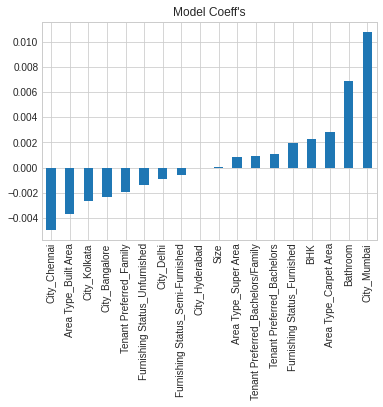

In [69]:
#Mapping regression model Coefficients, We can see the features that the model is most depended on.
coef = pd.Series(lin_reg.coef_, x.columns).sort_values()
coef.plot(kind='bar', title =  'Model Coeff\'s')

# From Above we can Notice:
1.If city is mumbai higher the rent will

2.More Bathrooms suggests more rent.

3.More BHK suggests more rent.

#ordinary least squares (OLS)
##Ordinary Least Squares Linear Regression combines the linear form of estimator and minimising the sum of the squares of the differences, so both requirements. But other forms of regression may only use one or even neither of them.

In [110]:
reg = sm.OLS(Y_train, X_train).fit()
#performing OLS regression on our data

In [111]:
#summary for the OLS regression.
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Rent   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     115.0
Date:                Tue, 06 Dec 2022   Prob (F-statistic):          8.57e-262
Time:                        04:32:42   Log-Likelihood:                 9313.5
No. Observations:                3796   AIC:                        -1.860e+04
Df Residuals:                    3782   BIC:                        -1.851e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
BHK                                   0.0022      0.001      2.882      0.004       0.001       0.004
Size                               2.404e-05   4.52e-06      5.322      0.000    1.52e-05    3.29e-05
Bathroom                              0.0069      0.001      9.334      0.000       0.005       0.008
Area Type_Built Area                 -0.0054      0.016     -0.341      0.733      -0.036       0.026
Area Type_Carpet Area                 0.0011      0.005      0.216      0.829      -0.009       0.011
Area Type_Super Area                 -0.0009      0.005     -0.176      0.861      -0.011       0.009
City_Bangalore                       -0.0034      0.001     -2.460      0.014      -0.006      -0.001
City_Chennai                         -0.0060      0.001     -4.459      0.000      -0.009      -0.003
City_Delhi                           -0.0019      0.001     -1.378      0.168      -0.005       0.001
City_Hyderabad                     1.311e-17   4.04e-17      0.325      0.746   -6.61e-17    9.23e-17
City_Kolkata                         -0.0037      0.001     -2.549      0.011      -0.007      -0.001
City_Mumbai                           0.0098      0.001      7.104      0.000       0.007       0.012
Furnishing Status_Furnished           0.0002      0.002      0.100      0.921      -0.004       0.004
Furnishing Status_Semi-Furnished     -0.0023      0.002     -1.139      0.255      -0.006       0.002
Furnishing Status_Unfurnished        -0.0031      0.002     -1.549      0.121      -0.007       0.001
Tenant Preferred_Bachelors           -0.0007      0.002     -0.321      0.748      -0.005       0.003
Tenant Preferred_Bachelors/Family    -0.0008      0.002     -0.424      0.671      -0.005       0.003
Tenant Preferred_Family              -0.0037      0.002     -1.733      0.083      -0.008       0.000
==============================================================================
Omnibus:                     9847.318   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        263194832.605
Skew:                          29.228   Prob(JB):                         0.00
Kurtosis:                    1291.650   Cond. No.                     2.25e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.17e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Model: The method of Ordinary Least Squares(OLS) is most widely used model due to its efficiency. This model gives best approximate of true population regression line. The principle of OLS is to minimize the square of errors ( ∑ei2 ).



https://www.geeksforgeeks.org/interpreting-the-results-of-linear-regression-using-ols-summary/

#Summary Analysis:
1.We can see above that the R squared is near 0.3 and It could have been much better since upper limit 1.

2.P-Value: Coefficients having p-values less than alpha are statistically significant. For example, if you chose alpha to be 0.05, coefficients having a p-value of 0.05 or less would be statistically significant. (i.e., you can reject the null hypothesis and say that the coefficient is significantly different from 0). So here the P less than 0.05 for (ie: BHK,SIZE,BATHROOM AND CITIES(BANG,CHENNAI,KOLKATTA AND MUMBAI) are statistically significant while others are not.)

3.Coef values: The parameter β (the regression coefficient) signifies the amount by which change in x must be multiplied to give the corresponding average change in y, or the amount y changes for a unit increase in x. In this way it represents the degree to which the line slopes upwards or downwards. The higher the coeff the better the significance(ie: here the city mumbai,bathroom and bhk have the highest significance)

In [28]:
reg = sm.OLS(Y_test, X_test).fit()
#performing OLS regression on Test data.

In [29]:
reg.summary()

#below we can see that the r squared in much better than that of for traing set.
#But for training dataset only BHK, SIZE AND BATHROOM have P value less than 0.05 suggesting only these are statistically significant for the test data set.
#Regarding coefs the significance is Bathroom, BHK and Size in that order.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Rent   R-squared:                       0.403
Model:                            OLS   Adj. R-squared:                  0.397
Method:                 Least Squares   F-statistic:                     63.45
Date:                Tue, 06 Dec 2022   Prob (F-statistic):           3.02e-98
Time:                        00:04:20   Log-Likelihood:                 3560.7
No. Observations:                 950   AIC:                            -7099.
Df Residuals:                     939   BIC:                            -7046.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
BHK                                  -0.0010      0.000     -2.313      0.021      -0.002      -0.000
Size                               3.706e-05   5.92e-06      6.258      0.000    2.54e-05    4.87e-05
Bathroom                              0.0041      0.000     10.423      0.000       0.003       0.005
Area Type_Built Area                  0.0011      0.004      0.253      0.800      -0.007       0.009
Area Type_Carpet Area                 0.0001      0.002      0.094      0.925      -0.003       0.003
Area Type_Super Area                 -0.0011      0.002     -0.759      0.448      -0.004       0.002
City_Bangalore                    -6.423e-20   6.94e-19     -0.093      0.926   -1.43e-18     1.3e-18
City_Chennai                          0.0005      0.001      0.589      0.556      -0.001       0.002
City_Delhi                        -2.781e-19    1.1e-18     -0.253      0.801   -2.44e-18    1.88e-18
City_Hyderabad                       -0.0004      0.001     -0.545      0.586      -0.002       0.001
City_Kolkata                       1.622e-19   5.76e-19      0.282      0.778   -9.68e-19    1.29e-18
City_Mumbai                                0          0        nan        nan           0           0
Furnishing Status_Furnished           0.0002      0.001      0.365      0.715      -0.001       0.001
Furnishing Status_Semi-Furnished    2.75e-05      0.001      0.053      0.958      -0.001       0.001
Furnishing Status_Unfurnished        -0.0002      0.000     -0.344      0.731      -0.001       0.001
Tenant Preferred_Bachelors         1.922e-05      0.001      0.031      0.975      -0.001       0.001
Tenant Preferred_Bachelors/Family    -0.0003      0.001     -0.656      0.512      -0.001       0.001
Tenant Preferred_Family               0.0004      0.001      0.620      0.535      -0.001       0.002
==============================================================================
Omnibus:                     1333.080   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           385237.155
Skew:                           7.632   Prob(JB):                         0.00
Kurtosis:                     100.464   Cond. No.                     1.75e+34
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.5e-62. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [71]:
#Performing shap analysis for above regression.
import shap
shap.initjs()
model = LinearRegression()
model.fit(X_test, Y_test)

LinearRegression()

In [72]:
explainer = shap.LinearExplainer(model, X_test)
shap_values = explainer.shap_values(X_test)

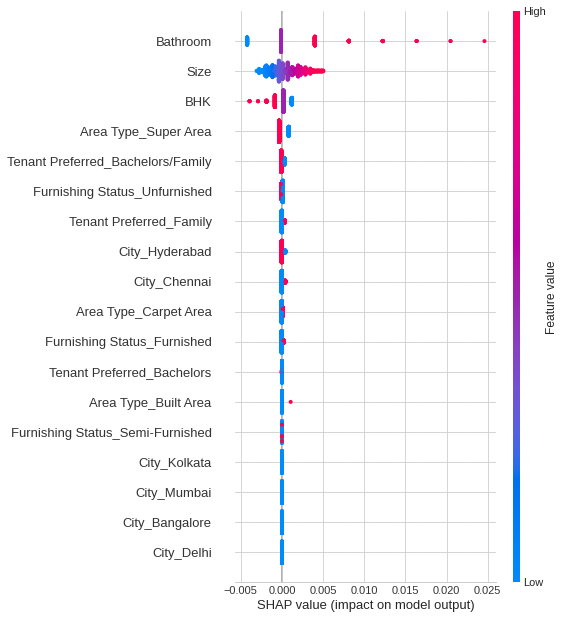

In [73]:
# Make plot. Index of [1] is explained in text below.
shap.summary_plot(shap_values, X_test)

#Feature importance: 

Variables are ranked in descending order.SHAP summary plot above suggests us the feature importance where Bathroom comes on top followed by size and BHK.

In [75]:
# plot the SHAP values for the 10th observation 

shap.initjs()
shap.force_plot(explainer.expected_value,shap_values[10,:], X_test.iloc[10,:]) 

#The individual force plot:
(Red/blue) Features that push the prediction higher (to the right) are shown in red, and those pushing the prediction lower are in blue. Here we can observe the particular observation is depending a lot on BHK,SIZE,Area type and City Hyderbad. They are acting on it but in opposite directions as shown above.

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values, X_test)

#The SHAP force plot:
It shows you exactly which features had the most influence on the model's prediction for a single observation. Collective force plot showing the overall effect of all features included in the final model, using absolute mean Shapley values.  As the graph progresses to the right, effects of the most important features for each individual learner are shown. Features that push the prediction higher (to the right) are shown in red, and those pushing the prediction lower are in blue. 

In [79]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(x, y, test_size=0.2, shuffle=False)
catagorical_features = []
numerical_features = [c for c in X_train2.columns if c not in catagorical_features]
cat = [([c], [OrdinalEncoder()]) for c in catagorical_features]
num = [([n], [SimpleImputer(), StandardScaler()]) for n in numerical_features]
mapper = DataFrameMapper(num + cat, df_out=True)
reg = RandomForestRegressor()

def evaluate(x, y, mapper=None, reg=None, transform=False):
    if transform:
        x = mapper.transform(x)
        x = sm.add_constant(x, has_constant='add') 
    y_pred2 = reg.predict(x)
    return mean_absolute_error(y, y_pred2)

pipeline = Pipeline([
    ('preprocess', mapper),
    ('reg', reg)
])
p = pipeline.fit(X_train2, y_train2)

train_mae = evaluate(X_train2, y_train2, reg=pipeline)
print(f"train MAE = {round(train_mae, 3)}")

train MAE = 0.002


In [80]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(x, y, test_size=0.2, shuffle=False)
catagorical_features = []
numerical_features = [c for c in X_test2.columns if c not in catagorical_features]
cat = [([c], [OrdinalEncoder()]) for c in catagorical_features]
num = [([n], [SimpleImputer(), StandardScaler()]) for n in numerical_features]
mapper = DataFrameMapper(num + cat, df_out=True)
reg = RandomForestRegressor()

def evaluate(x, y, mapper=None, reg=None, transform=False):
    if transform:
        x = mapper.transform(x)
        x = sm.add_constant(x, has_constant='add') 
    y_pred2 = reg.predict(x)
    return mean_absolute_error(y, y_pred2)

pipeline = Pipeline([
    ('preprocess', mapper),
    ('reg', reg)
])
p = pipeline.fit(X_test2, y_test2)

test_mae = evaluate(X_test2, y_test2, reg=pipeline)
print(f"test MAE = {round(test_mae, 3)}")


test MAE = 0.001


The lower the MAE score the better. This is because MAE is a measure of the average error between the predictions and intended targets, thus we want to minimise this value. Since for the above Random Forest regression the MAE is very low which suggests that our model is effective, also the MAE of test dataset is less than that of training set as well.


In [108]:
#installing treeinterpreter
! pip install treeinterpreter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [118]:
from sklearn.ensemble import RandomForestRegressor
from treeinterpreter import treeinterpreter as ti

rand_forest = RandomForestRegressor()
rand_forest.fit(X_train2, y_train2)

print("Test  R^2 Score : %.2f"%rand_forest.score(X_test2, y_test2))
print("Train R^2 Score : %.2f"%rand_forest.score(X_train2, y_train2))


Test  R^2 Score : 0.19
Train R^2 Score : 0.88


##Overfitting Problem:  From above we can see while train r square is quite high ie: 0.88 test's r square is pretty low ie:0.19 suggesting that the tree based model id overfitting our dataset.

<BarContainer object of 18 artists>

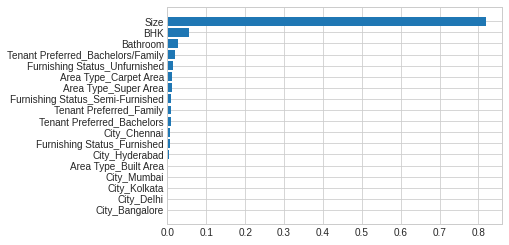

In [81]:
#looking for Feature importance 
sorted_idx = reg.feature_importances_.argsort()
features = numerical_features + catagorical_features 
result = sorted(zip(features, reg.feature_importances_), key = lambda x: x[1], reverse=False)
plt.barh([x[0] for x in result], [x[1] for x in result])

From above we can suggest that the Size has a greater importance. Followed by BHK and Bathroom but they are far behind though.

In [82]:
datac = pd.get_dummies(datac)

In [83]:
datac2 = datac.copy(deep=True)

In [84]:
#Removing target variable from dataset. to create input varaibles and output (or) target variable.
y2 = datac2['Rent']
drop_list3 = ['Rent']
datac2.drop(drop_list2,axis=1,inplace=True)
x2 = datac2.copy(deep=True)

In [85]:
#importing required models
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
#creating training and test data split.
X_train2, X_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size=0.2, shuffle=False)
#setting my model as Random forest classifier.
my_model = RandomForestClassifier(random_state=0).fit(X_train2, y_train2)

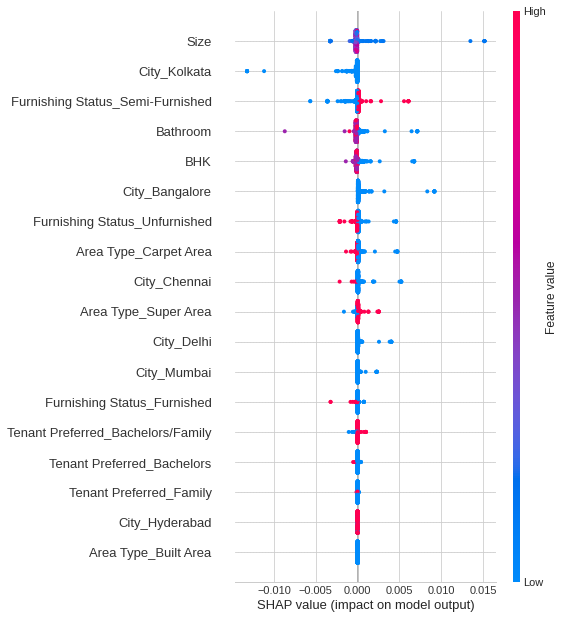

In [86]:
import shap  # package used to calculate Shap values
# Create object that can calculate shap values
explainer = shap.TreeExplainer(my_model)
# calculate shap values. This is what we will plot.
# Calculate shap_values for all of val_X rather than a single row, to have more data for plot.
shap_values = explainer.shap_values(X_test2)
# Make plot. Index of [1] is explained in text below.
shap.summary_plot(shap_values[1], X_test2)

###from above shap analysis feature importance we can see that the size is the most important feature followed by city kolkata, semi furnished, Bathroom and BHK.

In [89]:
# plot the SHAP values for the 10th observation 
shap.initjs()
shap.force_plot(explainer.expected_value[1],shap_values[1][10,:], X_test2.iloc[10,:]) 

#The individual force plot:
(Red/blue)Features that push the prediction higher (to the right) are shown in red, and those pushing the prediction lower are in blue. This value in highly dependent on size, bathroom,bhk and City Kolkata effecting it very much.

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], X_test2)
#The SHAP force plot shows you exactly which features had the most influence on the model's prediction for a single observation.
#Collective force plot showing the overall effect of all features included in the final model, using absolute mean Shapley values. 
#As the graph progresses to the right, effects of the most important features for each individual learner are shown. 
#Features that push the prediction higher (to the right) are shown in red, and those pushing the prediction lower are in blue. 

In [90]:
! pip install h2o
#Installing H20

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 177.5 MB 34 kB/s 
  Created wheel for h2o: filename=h2o-3.38.0.3-py2.py3-none-any.whl size=177541401 sha256=8424bfa2be425d1881ce1afe05e7fbb51e7f8d9beee57a4ecf39844441bb9922
  Stored in directory: /root/.cache/pip/wheels/16/f8/f4/69e1ff6a0d1cb61bdbc0d9888ee8437a1acf1eb1c6ffb8be20
Successfully built h2o


In [94]:
#Importing h2o and automl modules.
import h2o
from h2o.automl import H2OAutoML
import os

In [95]:
h2o.init(strict_version_check=False)
#It starts the H2o clusters

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.17" 2022-10-18; OpenJDK Runtime Environment (build 11.0.17+8-post-Ubuntu-1ubuntu218.04); OpenJDK 64-Bit Server VM (build 11.0.17+8-post-Ubuntu-1ubuntu218.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.8/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpna5phnf6
  JVM stdout: /tmp/tmpna5phnf6/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpna5phnf6/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


--------------------------  ----------------------------------
H2O_cluster_uptime:         05 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.38.0.3
H2O_cluster_version_age:    12 days
H2O_cluster_name:           H2O_from_python_unknownUser_zvgh3l
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.172 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
Python_version:             3.8.15 final
--------------------------  ----------------------------------

In [96]:
df = h2o.import_file("/content/drive/MyDrive/House_Rent_Dataset.csv")

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [97]:
df_train,df_test,df_valid = df.split_frame(ratios=[.7, .15])
#creating training , testing and validating datasets with 70,15,15 ratio.

In [98]:
y3 = "Rent"
x3 = df.columns
x3.remove(y3)
#Differntiating X and Y

In [99]:
aml = H2OAutoML(max_models = 10, seed = 10, exclude_algos = [], verbosity="info", nfolds=0)
#Applying automl it will run max of 10 models and we won't be excluding any model.

In [100]:
aml.train(x = x3, y = y3, training_frame = df_train, validation_frame=df_valid)
#Training the automl model with train dataset, and we are using validation dataset for validating all the models involved

AutoML progress: |
03:24:56.911: Project: AutoML_1_20221206_32456
03:24:56.913: Cross-validation disabled by user: no fold column nor nfolds > 1.
03:24:56.914: Setting stopping tolerance adaptively based on the training frame: 0.017290276521281022
03:24:56.915: Build control seed: 10
03:24:56.916: training frame: Frame key: AutoML_1_20221206_32456_training_py_2_sid_bacd    cols: 12    rows: 3345  chunks: 8    size: 376921  checksum: 3311643916927834581
03:24:56.916: validation frame: Frame key: py_4_sid_bacd    cols: 12    rows: 694  chunks: 8    size: 322519  checksum: -2342516744544614506
03:24:56.917: leaderboard frame: Frame key: py_4_sid_bacd    cols: 12    rows: 694  chunks: 8    size: 322519  checksum: -2342516744544614506
03:24:56.917: blending frame: NULL
03:24:56.917: response column: Rent
03:24:56.917: fold column: null
03:24:56.918: weights column: null
03:24:56.951: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), l

Model Details
=============
H2ORandomForestEstimator : Distributed Random Forest
Model Key: DRF_1_AutoML_1_20221206_32456


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    35                 35                          1.66893e+06            20           20           20            1394          1753          1555.37

ModelMetricsRegression: drf
** Reported on train data. **

MSE: 5541981416.381376
RMSE: 74444.48546656345
MAE: 15226.631932521708
RMSLE: 0.45816035138309147
Mean Residual Deviance: 5541981416.381376

ModelMetricsRegression: drf
** Reported on validation data. **

MSE: 633382933.9218078
RMSE: 25167.100228707473
MAE: 11262.048268842953
RMSLE: 0.4332086940737653
Mean Residual Deviance: 633382933.9218078

Scoring History: 
    timestamp            duration    number_of_trees    training_rmse    training_mae    training_deviance    validation_rmse    validation_mae    validation_deviance
--  -------------------  ----------  -----------------  ---------------  --------------  -------------------  -----------------  ----------------  ---------------------
    2022-12-06 03:25:06  0.006 sec   0                  nan              nan             nan                  nan                nan               nan
    2022-12-06 03:25:08  1.415 sec   5                  78401.1          17281.3         6.14673e+09          24517              11395.9           6.01083e+08
    2022-12-06 03:25:09  2.607 sec   10                 79219.5          16113.8         6.27573e+09          21965.5            10589.7           4.82483e+08
    2022-12-06 03:25:10  4.257 sec   15                 82754.7          16310.8         6.84835e+09          25557.3            10981.2           6.53175e+08
    2022-12-06 03:25:11  4.978 sec   20                 77823.3          15738.2         6.05647e+09          26478.6            11598.8           7.01119e+08
    2022-12-06 03:25:12  5.656 sec   25                 74944.6          15522.7         5.61669e+09          25896.1            11340.7           6.70606e+08
    2022-12-06 03:25:12  6.307 sec   30                 75791.4          15321.1         5.74434e+09          25012.9            11145.8           6.25643e+08
    2022-12-06 03:25:13  6.967 sec   35                 74444.5          15226.6         5.54198e+09          25167.1            11262             6.33383e+08

Variable Importances: 
variable           relative_importance    scaled_importance    percentage
-----------------  ---------------------  -------------------  ------------
Floor              2.268e+14              1                    0.348562
Size               1.4884e+14             0.656262             0.228748
City               6.51707e+13            0.287348             0.100159
Bathroom           5.38599e+13            0.237477             0.0827755
BHK                4.73754e+13            0.208886             0.0728097
Posted On          3.53198e+13            0.155731             0.0542819
Area Locality      2.96042e+13            0.13053              0.0454977
Tenant Preferred   1.30353e+13            0.0574747            0.0200335
Point of Contact   1.21552e+13            0.0535944            0.0186809
Furnishing Status  9.99504e+12            0.0440698            0.015361
Area Type          8.51817e+12            0.037558             0.0130913

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

From above we can suggest that "**XGBoost_3**" was our leader model in the automl(ie: best model for the given dataset). And the model has about 35 trees present init overall. And we can see the RMSE: 30453.8630425915, MAE: 10487.911180257726 above probably since we didn't normalize the data. 


We can also see the scores of all 10 models used in automl in ascending order as well. 

And from the below Variable importance table we can rank the present variables in below order.

Size,Area Marathali,Floor 4, City Mumbai, Posted on and Bathroom etc.





In [101]:
lb = aml.leaderboard

In [106]:
lb.head()

model_id                              rmse          mse      mae       rmsle    mean_residual_deviance
---------------------------------  -------  -----------  -------  ----------  ------------------------
DRF_1_AutoML_1_20221206_32456      25167.1  6.33383e+08  11262      0.433209               6.33383e+08
GBM_3_AutoML_1_20221206_32456      27231.8  7.41571e+08  11982.4    0.466163               7.41571e+08
GBM_4_AutoML_1_20221206_32456      27323.6  7.46577e+08  12434.6  nan                      7.46577e+08
GBM_2_AutoML_1_20221206_32456      29210.2  8.53238e+08  13066.6    0.483836               8.53238e+08
GBM_1_AutoML_1_20221206_32456      31739.3  1.00739e+09  15271      0.525333               1.00739e+09
XRT_1_AutoML_1_20221206_32456      32075.9  1.02887e+09  13223.8    0.483826               1.02887e+09
XGBoost_1_AutoML_1_20221206_32456  32160.9  1.03432e+09  14399.2  nan                      1.03432e+09
XGBoost_2_AutoML_1_20221206_32456  39940.3  1.59523e+09  16159.5  nan                      1.59523e+09
GLM_1_AutoML_1_20221206_32456      42504.9  1.80666e+09  27876.6    1.09575                1.80666e+09
XGBoost_3_AutoML_1_20221206_32456  59290    3.51531e+09  15817.3  nan                      3.51531e+09
[10 rows x 6 columns]

In [105]:
df_pred=aml.leader.predict(df_test)

drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [20]:
df_pred.head()

predict
---------
 10564.5
 17592
  8853.78
 17529.1
 10326.5
  7736.14
  8853.78
  9404.7
 10013.6
  8546.82
[10 rows x 1 column]

In [21]:
aml.leader.model_performance(df_test)

ModelMetricsRegression: xgboost
** Reported on test data. **

MSE: 1831630056.4172425
RMSE: 42797.547317775614
MAE: 13384.588123793013
RMSLE: NaN
Mean Residual Deviance: 1831630056.4172425

We can see from above that mse, rmse and mae values are quite high may be due to not standardizing the data before feeding to automl I guess.

In [25]:
import shap
shap.initjs()
#import shap for shap analysis

# Leaderboard

> Leaderboard shows models with their metrics and their predictions for a given row. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id                               rmse          mse      mae       rmsle    mean_residual_deviance    training_time_ms    predict_time_per_row_ms  algo       predict
----------------------------------  -------  -----------  -------  ----------  ------------------------  ------------------  -------------------------  -------  ---------
XGBoost_2_AutoML_1_20221205_203929  40888.2  1.67184e+09  15593.1  nan                      1.67184e+09                1358                   0.010835  XGBoost   12202.2
XGBoost_3_AutoML_1_20221205_203929  42797.5  1.83163e+09  13384.6  nan                      1.83163e+09                 490                   0.007741  XGBoost   10564.5
XGBoost_1_AutoML_1_20221205_203929  45635.1  2.08257e+09  16258.2  nan                      2.08257e+09                1867                   0.011534  XGBoost    7466.03
XRT_1_AutoML_1_20221205_203929      46661.9  2.17733e+09  13364.5    0.410064               2.17733e+09                6442                   0.038082  DRF        9798.85
DRF_1_AutoML_1_20221205_203929      46951.2  2.20441e+09  12754.7    0.384876               2.20441e+09               11280                   0.065675  DRF        9376.53
GBM_3_AutoML_1_20221205_203929      48208.1  2.32402e+09  14345.5    0.445529               2.32402e+09                 868                   0.028009  GBM        9227
GBM_1_AutoML_1_20221205_203929      48639.4  2.36579e+09  15626    nan                      2.36579e+09                4266                   0.070578  GBM        7445.27
GBM_2_AutoML_1_20221205_203929      49815.7  2.4816e+09   14407.1    0.432939               2.4816e+09                  906                   0.023443  GBM        8868.68
GBM_4_AutoML_1_20221205_203929      52816.9  2.78962e+09  14614.5    0.441674               2.78962e+09                1026                   0.053733  GBM        9930.47
GLM_1_AutoML_1_20221205_203929      67552.8  4.56338e+09  30474.8    1.08449                4.56338e+09                1912                   0.029746  GLM       34753.4
[10 rows x 10 columns]

# SHAP Explanation

> SHAP explanation shows contribution of features for a given instance. The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function. H2O implements TreeSHAP which when the features are correlated, can increase contribution of a feature that had no influence on the prediction.

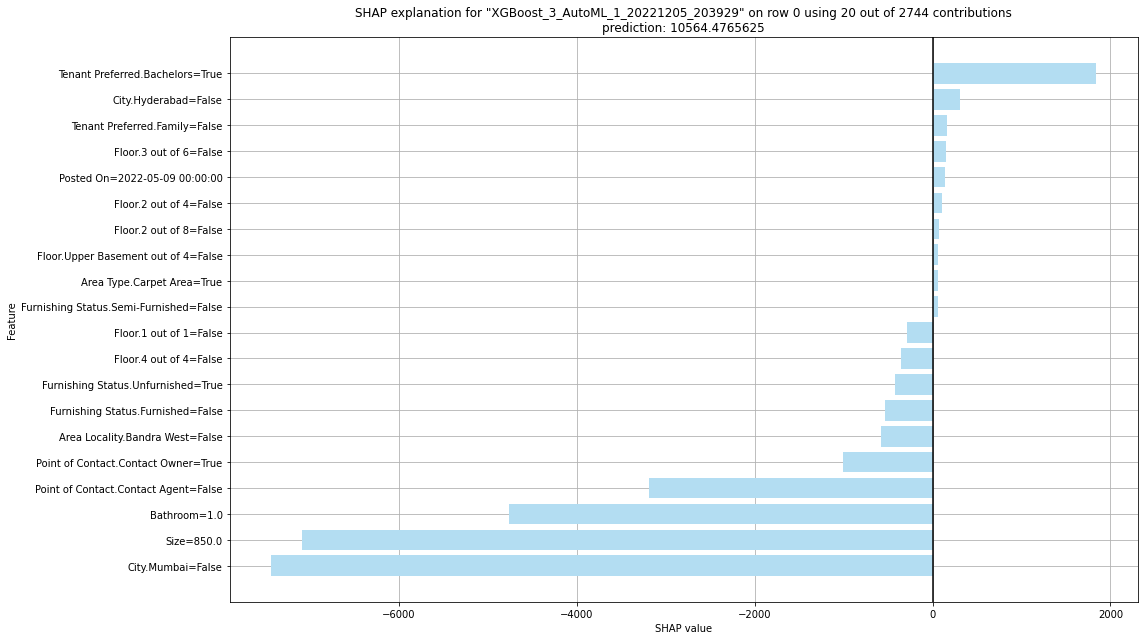

# Leaderboard

> Leaderboard shows models with their metrics and their predictions for a given row. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id                               rmse          mse      mae       rmsle    mean_residual_deviance    training_time_ms    predict_time_per_row_ms  algo       predict
----------------------------------  -------  -----------  -------  ----------  ------------------------  ------------------  -------------------------  -------  ---------
XGBoost_2_AutoML_1_20221205_203929  40888.2  1.67184e+09  15593.1  nan                      1.67184e+09                1358                   0.010835  XGBoost   12202.2
XGBoost_3_AutoML_1_20221205_203929  42797.5  1.83163e+09  13384.6  nan                      1.83163e+09                 490                   0.007741  XGBoost   10564.5
XGBoost_1_AutoML_1_20221205_203929  45635.1  2.08257e+09  16258.2  nan                      2.08257e+09                1867                   0.011534  XGBoost    7466.03
XRT_1_AutoML_1_20221205_203929      46661.9  2.17733e+09  13364.5    0.410064               2.17733e+09                6442                   0.038082  DRF        9798.85
DRF_1_AutoML_1_20221205_203929      46951.2  2.20441e+09  12754.7    0.384876               2.20441e+09               11280                   0.065675  DRF        9376.53
GBM_3_AutoML_1_20221205_203929      48208.1  2.32402e+09  14345.5    0.445529               2.32402e+09                 868                   0.028009  GBM        9227
GBM_1_AutoML_1_20221205_203929      48639.4  2.36579e+09  15626    nan                      2.36579e+09                4266                   0.070578  GBM        7445.27
GBM_2_AutoML_1_20221205_203929      49815.7  2.4816e+09   14407.1    0.432939               2.4816e+09                  906                   0.023443  GBM        8868.68
GBM_4_AutoML_1_20221205_203929      52816.9  2.78962e+09  14614.5    0.441674               2.78962e+09                1026                   0.053733  GBM        9930.47
GLM_1_AutoML_1_20221205_203929      67552.8  4.56338e+09  30474.8    1.08449                4.56338e+09                1912                   0.029746  GLM       34753.4
[10 rows x 10 columns]

# SHAP Explanation

> SHAP explanation shows contribution of features for a given instance. The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function. H2O implements TreeSHAP which when the features are correlated, can increase contribution of a feature that had no influence on the prediction.

In [28]:
aml.explain_row(df_test, row_index=0)
#using shap explain for single row ie: 1st observation.
#we can see that below observations are pretty self expainatory.


#From below :
##1.We can understand that the important variables are Size,Area Marthahali, floor 4 and cityMumbai.

##2.But from shape summary plot we can see that the order is mumbai,size, bathroom and BHK(pretty much like lin regression and random forest from above).

##3.Partial Dependence plots below gave the relavence of rent with respect to each attribute in the features(ex: size, each area locality etc.)

##4.PDP cleary specifing the mean,least and highest rent for a given instance in a feature.

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

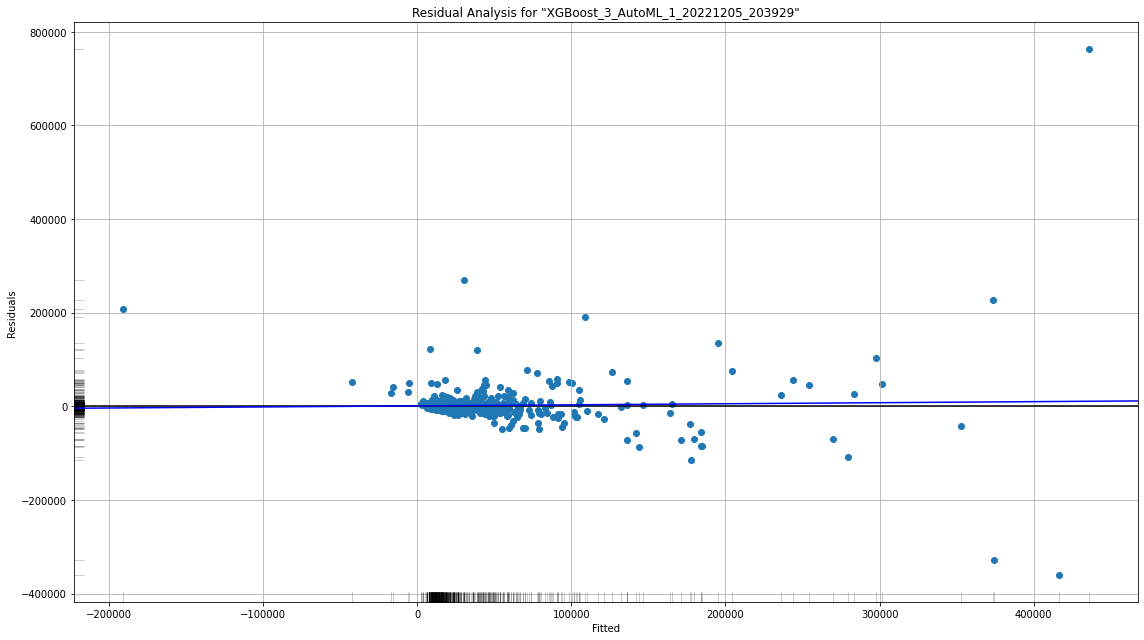

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

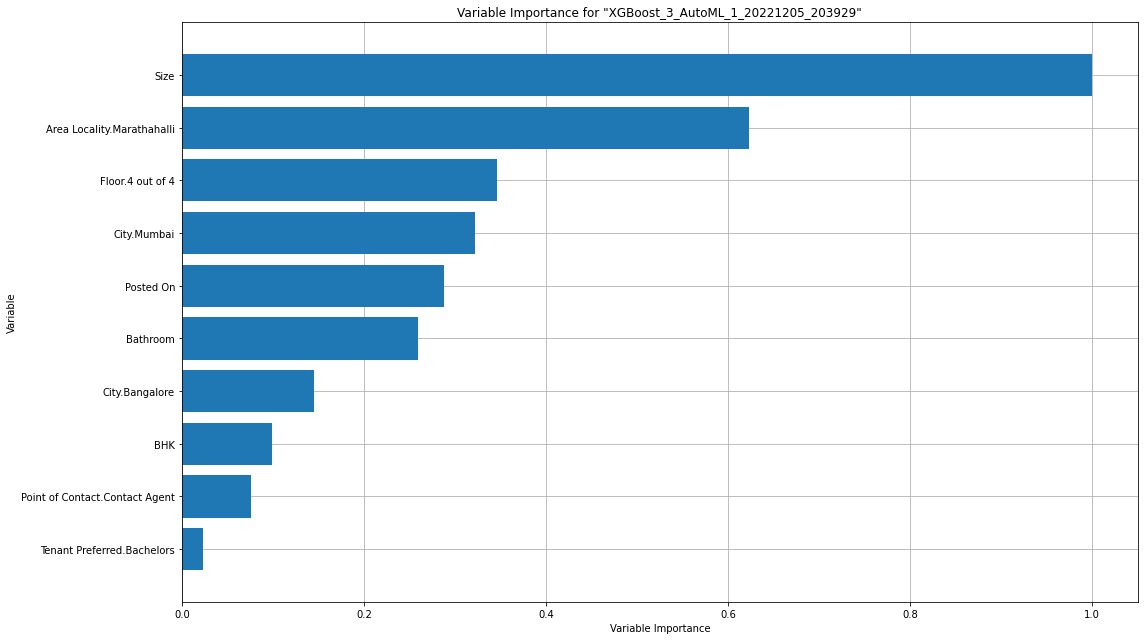

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

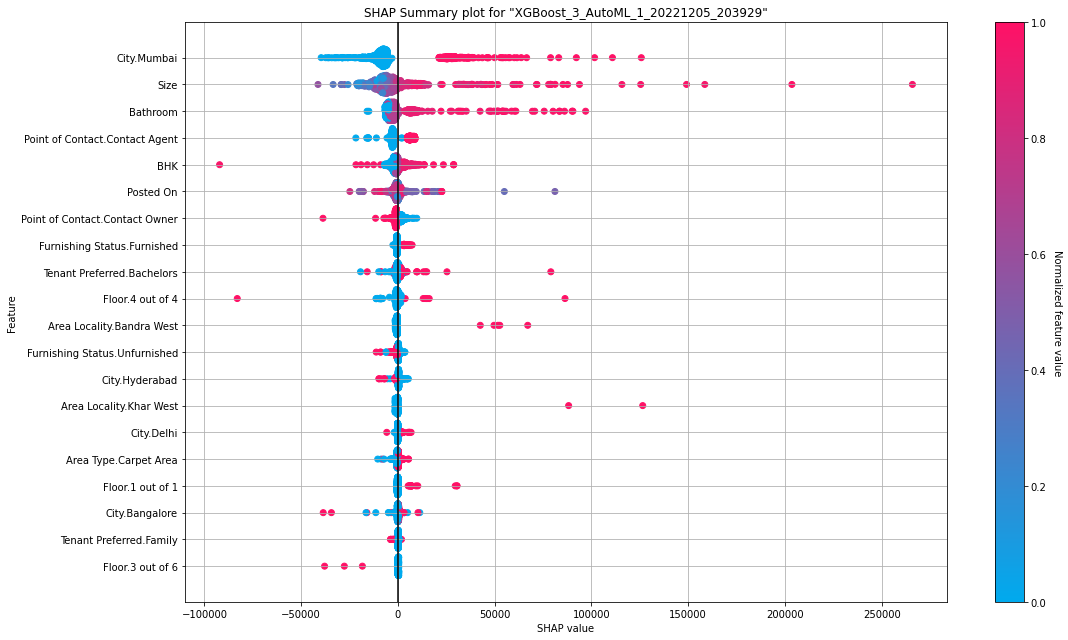

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

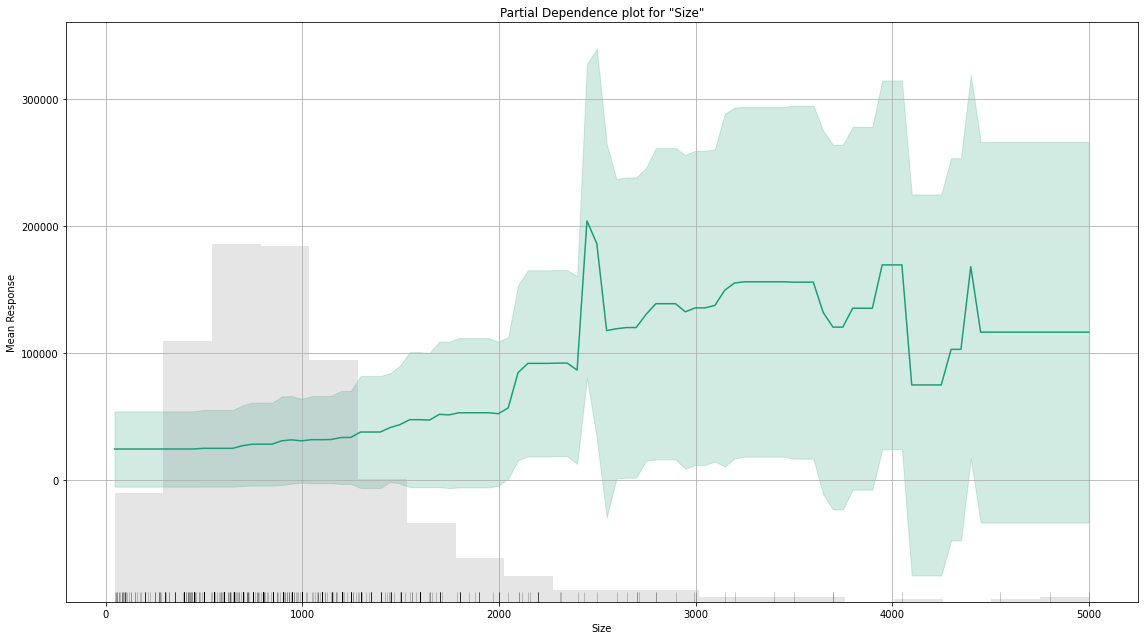

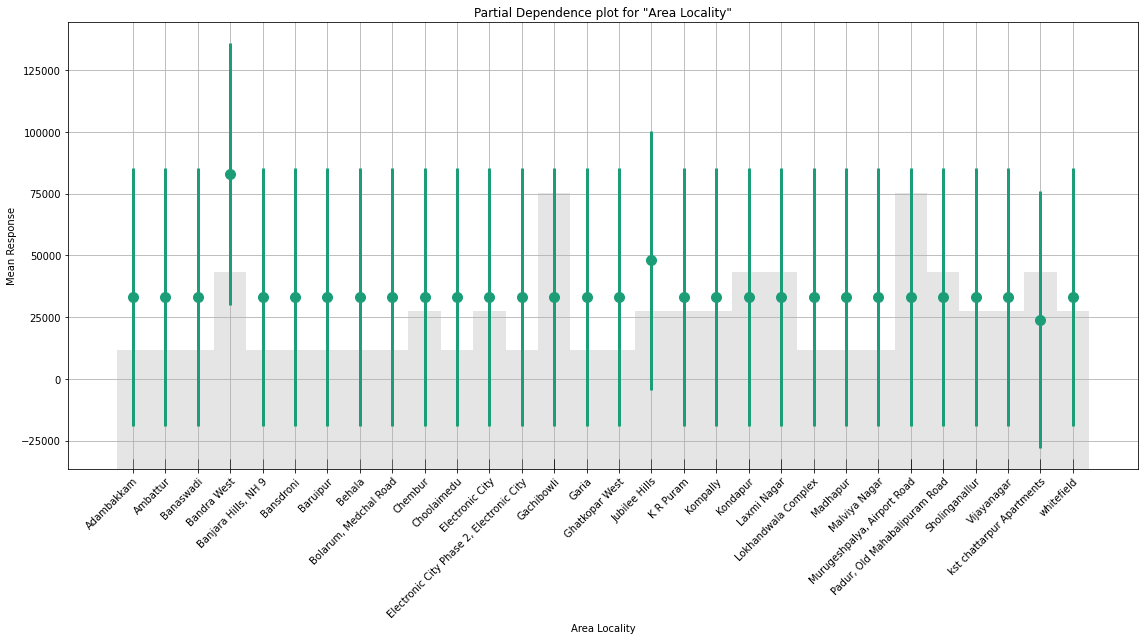

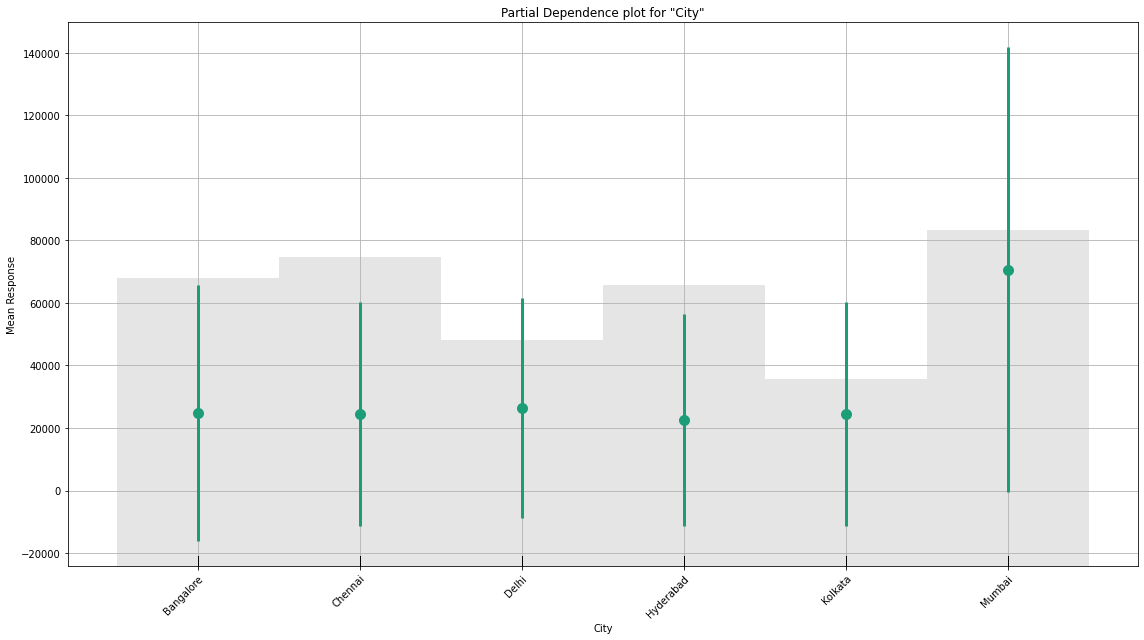

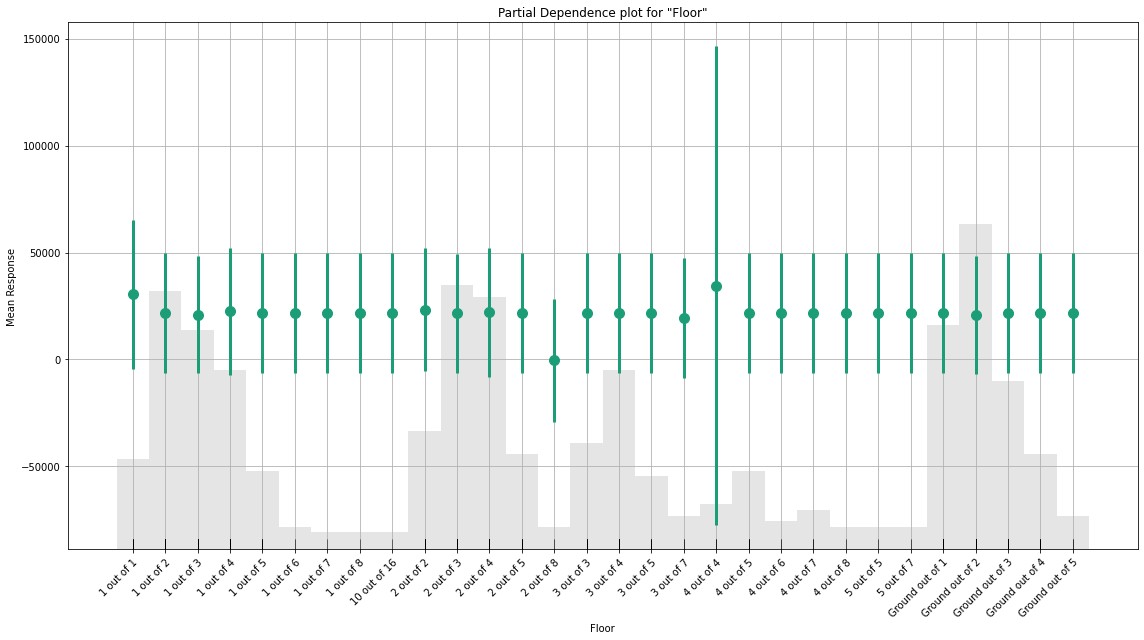

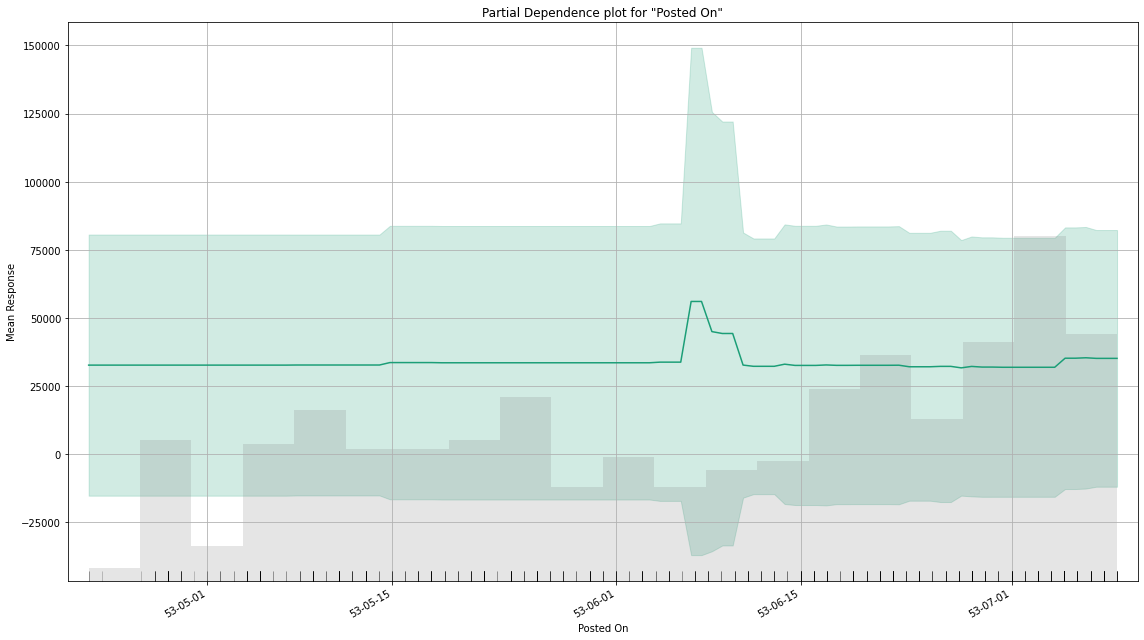

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

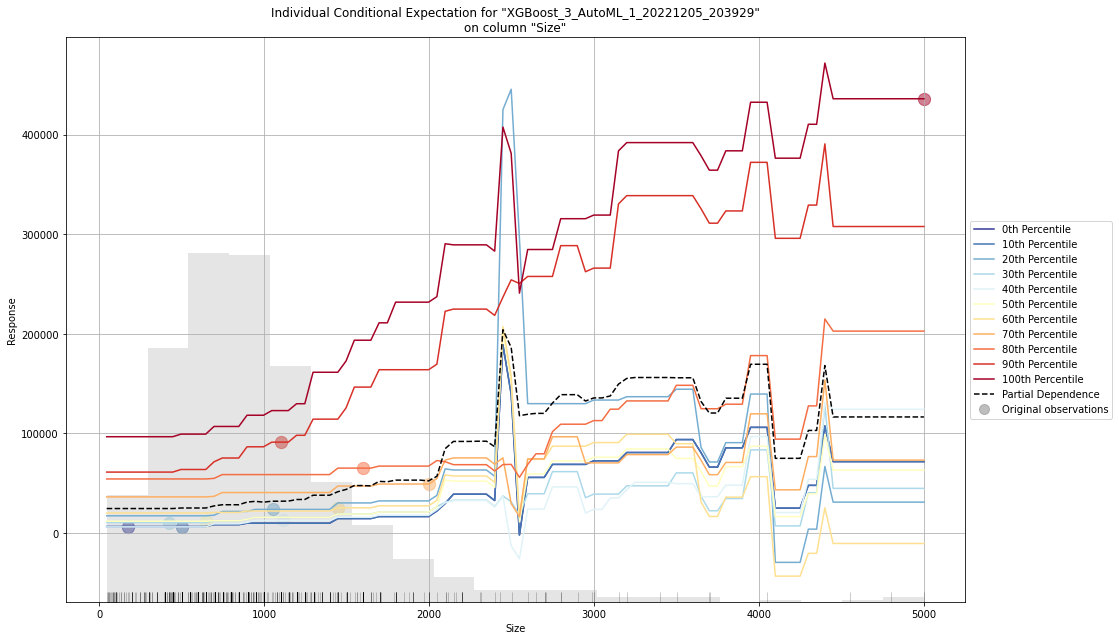

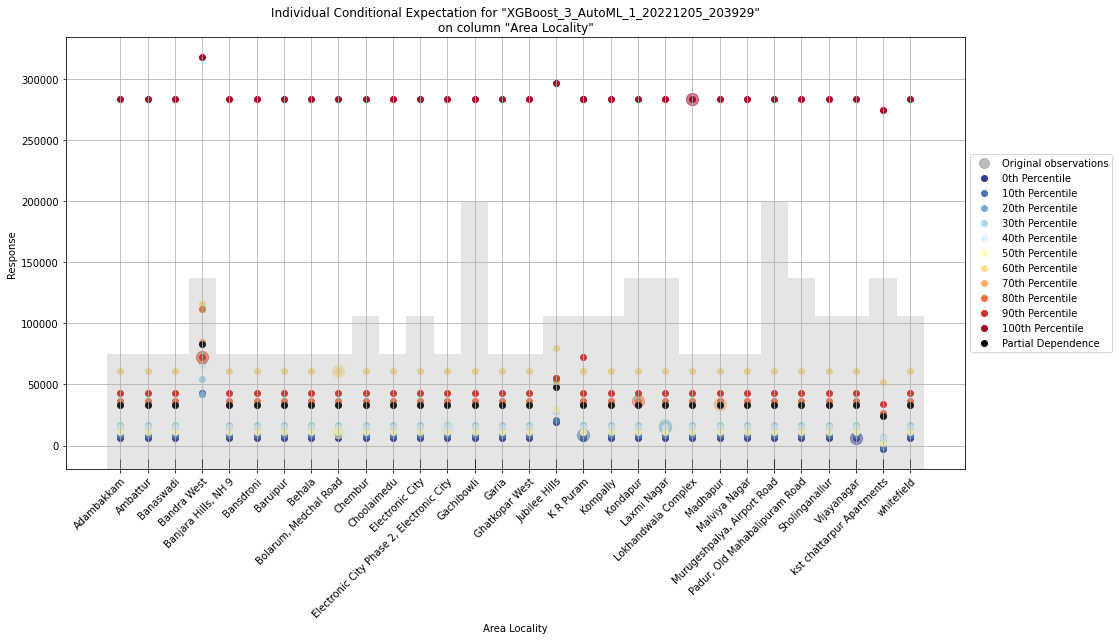

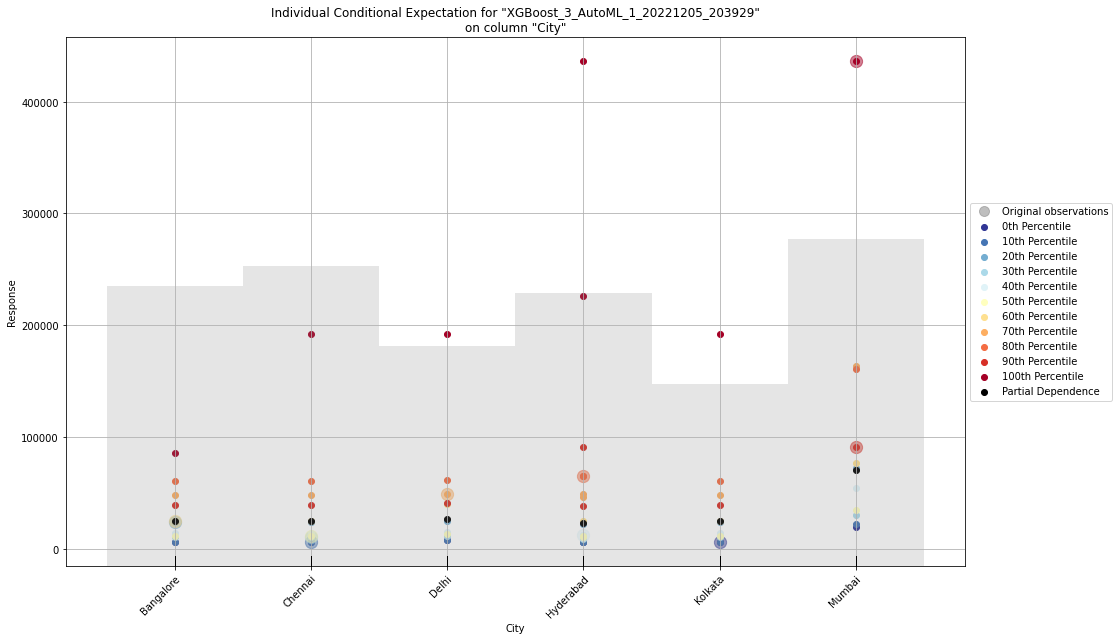

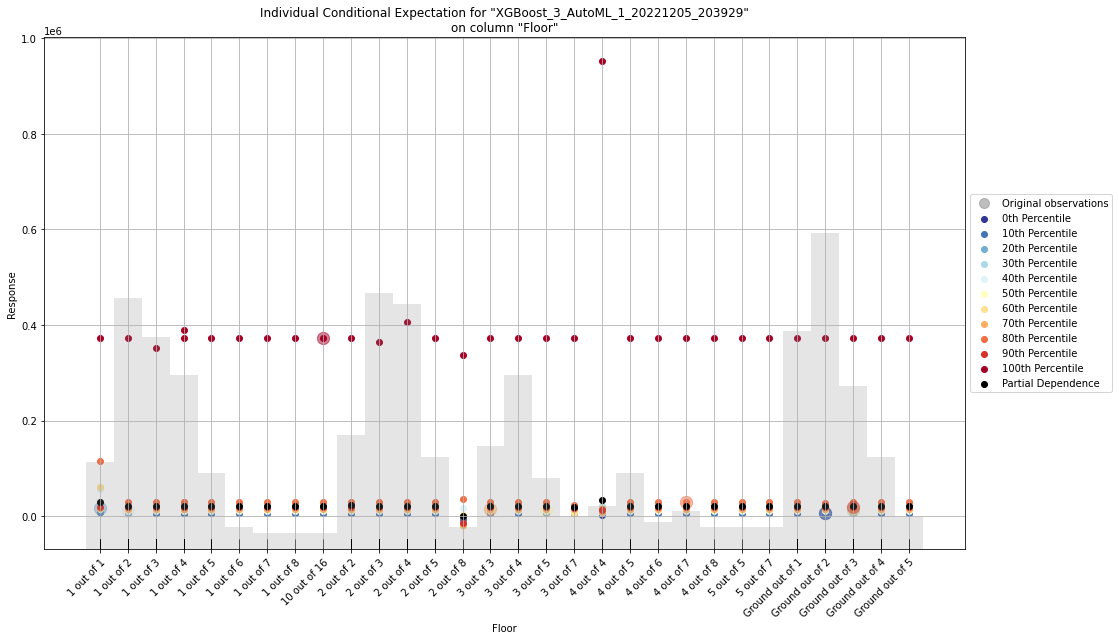

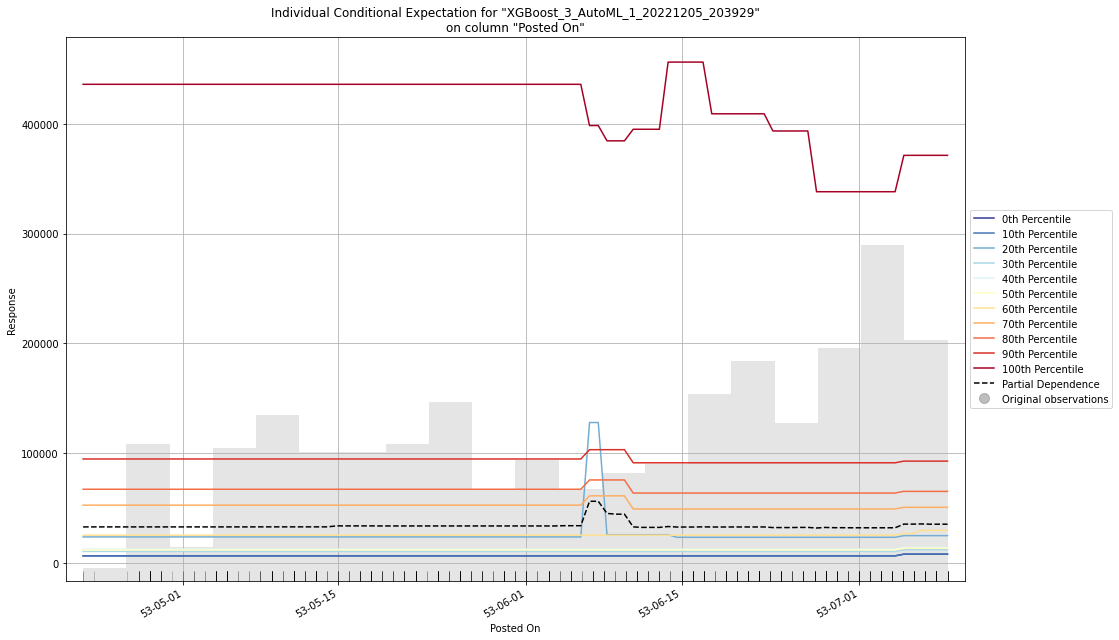

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

In [29]:
aml.leader.explain(df_test)

#References:

https://towardsdatascience.com/explain-any-models-with-the-shap-values-use-the-kernelexplainer-79de9464897a

https://medium.com/dataman-in-ai/explain-your-model-with-the-shap-values-bc36aac4de3d

https://www.kaggle.com/code/cristianlazoquispe/automl-h2o-shap-explanation/notebook

https://github.com/ajhalthor/model-interpretability/blob/main/Shap%20Values.ipynb

